In [1]:
include("LiPoSID.jl")
using QuantumOptics
basis = NLevelBasis(2)
using DynamicPolynomials
using Plots

### Load exact data

In [2]:
γᵗˣᵗ = "0.079477"

parentdir = pwd()
data_dir = parentdir*"\\DATA\\"
println(data_dir)

ρᵍ, tᵍ = LiPoSID.get_rho_series(data_dir*"State_B1_2CUT_data.h5", γᵗˣᵗ)
ρᵉ, tᵉ = LiPoSID.get_rho_series(data_dir*"State_B2_2CUT_data.h5", γᵗˣᵗ)
ρˣ, tˣ = LiPoSID.get_rho_series(data_dir*"State_B3_2CUT_data.h5", γᵗˣᵗ)
ρʸ, tʸ = LiPoSID.get_rho_series(data_dir*"State_B4_2CUT_data.h5", γᵗˣᵗ)

@assert tᵍ == tᵉ == tˣ == tʸ 

t = convert(Vector{Float64}, tᵉ)
@assert maximum(diff(t)) ≈ minimum(diff(t)) ≈ t[2]-t[1]
Δt = t[2]-t[1]
t_steps = length(t)

C:\Users\Zakhar\Documents\GitHub\POP_fail\DATA\


1256

### Perform POP SID

In [3]:
#using DynamicPolynomials

@polyvar e[1:2]
@polyvar d[1:2]

    Hˢʸᵐᵇ = [ e[1]               d[1] + im*d[2]
              d[1] - im*d[2]     0.             ]

    Hˢʸᵐᵇₐₙ = [ e[1]   0
                0      0. ]

@polyvar a[1:4]
@polyvar b[1:4]

    Aˢʸᵐᵇ = [ a[1] + im*b[1]           a[2] + im*b[2]
              a[3] + im*b[3]           a[4] + im*b[4]   ]

    Aˢʸᵐᵇₐₙ = [ 0      1 
                0      0.  ]

@polyvar g

#    POP fails for traceless setup 
#    Aˢʸᵐᵇ = [ a[1] + im*b[1]           a[2] + im*b[2]
#             a[3] + im*b[3]          -a[1] - im*b[1]   ]

objₑₓ = 0

objₑₓₐₙ = 0

for ρ in [ρᵍ, ρᵉ, ρˣ, ρʸ]

    # Convert cut ρ series:
    ρ = convert(Vector{Matrix{ComplexF64}}, ρ)

    objₑₓ += LiPoSID.simpson_obj(ρ, t,  Hˢʸᵐᵇ, [Aˢʸᵐᵇ])
    
    objₑₓₐₙ += LiPoSID.simpson_obj(ρ, t,  Hˢʸᵐᵇₐₙ, [Aˢʸᵐᵇₐₙ], g)

end # of files (initial states) loop

objₑₓ 

0.19873096716801214a₁⁴ - 0.0017155126525017488a₁³a₂ + 0.0016619276546841692a₁³a₃ - 0.7949238686720486a₁³a₄ - 0.002020841077552012a₁³b₂ - 0.002699338341011222a₁³b₃ + 4.807681833454622a₁²a₂² - 12.58141127859036a₁²a₂a₃ + 0.005200122955322839a₁²a₂a₄ + 0.002020841077552012a₁²a₂b₁ - 0.0012575996083348737a₁²a₂b₂ - 0.0012575996083348737a₁²a₂b₃ + 0.0026993383410112183a₁²a₂b₄ + 10.980300647882432a₁²a₃² - 0.0050393679618701a₁²a₃a₄ + 0.002699338341011222a₁²a₃b₁ + 0.0012575996083348737a₁²a₃b₂ - 0.007419517759574447a₁²a₃b₄ + 1.1923858030080745a₁²a₄² + 0.005384025969196823a₁²a₄b₂ + 0.007419517759574447a₁²a₄b₃ + 0.3974619343360243a₁²b₁² - 0.0017155126525017488a₁²b₁b₂ + 0.0016619276546841692a₁²b₁b₃ - 0.7949238686720486a₁²b₁b₄ + 4.807765903889424a₁²b₂² + 12.581579419459953a₁²b₂b₃ - 0.0016619276546841694a₁²b₂b₄ + 10.980300647882432a₁²b₃² - 0.0050393679618701a₁²b₃b₄ + 1.1923858030080745a₁²b₄² - 0.005253707953140427a₁a₂³ + 0.005092952959687677a₁a₂²a₃ - 4.26462851964688a₁a₂²a₄ + 0.0012575996083348737a₁a₂²b₁

In [4]:
objₑₓₐₙ

0.7949238686720486e₁² + 1.6697789826640932g² - 39.94662884489179e₁ - 0.26545473091539g + 501.8627949039175

In [5]:
α = 0.0001
#objₑₓʳᵉᵍ = objₑₓ + α * (d[1]^2 + d[2]^2 + a[1]^2 + b[1]^2 + a[3]^2 + b[3]^2 + a[4]^2 + b[4]^2);

objₑₓʳᵉᵍ = objₑₓ + α * (e[1]^2 + d[1]^2 + d[2]^2
                        + a[1]^2 + b[1]^2 + a[2]^2 + b[2]^2 + a[3]^2 + b[3]^2 + a[4]^2 + b[4]^2)

0.19873096716801214a₁⁴ - 0.0017155126525017488a₁³a₂ + 0.0016619276546841692a₁³a₃ - 0.7949238686720486a₁³a₄ - 0.002020841077552012a₁³b₂ - 0.002699338341011222a₁³b₃ + 4.807681833454622a₁²a₂² - 12.58141127859036a₁²a₂a₃ + 0.005200122955322839a₁²a₂a₄ + 0.002020841077552012a₁²a₂b₁ - 0.0012575996083348737a₁²a₂b₂ - 0.0012575996083348737a₁²a₂b₃ + 0.0026993383410112183a₁²a₂b₄ + 10.980300647882432a₁²a₃² - 0.0050393679618701a₁²a₃a₄ + 0.002699338341011222a₁²a₃b₁ + 0.0012575996083348737a₁²a₃b₂ - 0.007419517759574447a₁²a₃b₄ + 1.1923858030080745a₁²a₄² + 0.005384025969196823a₁²a₄b₂ + 0.007419517759574447a₁²a₄b₃ + 0.3974619343360243a₁²b₁² - 0.0017155126525017488a₁²b₁b₂ + 0.0016619276546841692a₁²b₁b₃ - 0.7949238686720486a₁²b₁b₄ + 4.807765903889424a₁²b₂² + 12.581579419459953a₁²b₂b₃ - 0.0016619276546841694a₁²b₂b₄ + 10.980300647882432a₁²b₃² - 0.0050393679618701a₁²b₃b₄ + 1.1923858030080745a₁²b₄² - 0.005253707953140427a₁a₂³ + 0.005092952959687677a₁a₂²a₃ - 4.26462851964688a₁a₂²a₄ + 0.0012575996083348737a₁a₂²b₁

In [6]:
solₑₓʳᵉᵍ, best_methodₑₓʳᵉᵍ = LiPoSID.sos_min_newton(objₑₓʳᵉᵍ) 
Hₑₓʳᵉᵍ = subs(Hˢʸᵐᵇ, solₑₓʳᵉᵍ)
Lₑₓʳᵉᵍ = subs(Aˢʸᵐᵇ, solₑₓʳᵉᵍ)

************************TSSOS************************
TSSOS is launching...
optimum = 0.06368374650777209

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Found a local optimal solution giving an upper bound: 0.07498095289957973 and a relative optimality gap: 0.011297206391807646.
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.06368327847959122
Found a local optimal solution giving an upper bound: 0.07498095289957973 and a relative optimality gap: 0.01129767441998851.
No higher TSSOS hierarchy!


2×2 Matrix{Polynomial{true, ComplexF64}}:
 (2.71628e-16-8.69532e-18im)  (2.29307e-14+4.22984e-15im)
 (1.36466e-16+3.86107e-17im)  (-3.67347e-16-3.05073e-18im)

In [7]:
Hₑₓʳᵉᵍ

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (25.1229+0.0im)            (7.54124e-5-7.07137e-5im)
 (7.54124e-5+7.07137e-5im)  0.0+0.0im

In [8]:
solₑₓⁿᵉʷ, best_methodₑₓⁿᵉʷ = LiPoSID.sos_min_newton(objₑₓ) 
Hˢⁱᵈₑₓ = subs(Hˢʸᵐᵇ, solₑₓⁿᵉʷ)
Lˢⁱᵈₑₓ = subs(Aˢʸᵐᵇ, solₑₓⁿᵉʷ)

************************TSSOS************************
TSSOS is launching...
optimum = 0.0005505153724634764
The local solver failed!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.0005503731385784542
Global optimality certified!
No higher TSSOS hierarchy!


2×2 Matrix{Polynomial{true, ComplexF64}}:
 (-4.95956-9.70826im)    (0.279452+0.0847142im)
 (0.0616455+0.023148im)  (-4.95949-9.70825im)

In [9]:
best_methodₑₓⁿᵉʷ

"scaled_tssos"

In [10]:
solₑₓₐₙⁿᵉʷ, best_methodₑₓₐₙⁿᵉʷ = LiPoSID.sos_min(objₑₓₐₙ) 
Hˢⁱᵈₑₓₐₙ = subs(Hˢʸᵐᵇₐₙ, solₑₓₐₙⁿᵉʷ)
Lˢⁱᵈₑₓₐₙ = subs(Aˢʸᵐᵇₐₙ, solₑₓₐₙⁿᵉʷ)

************************TSSOS************************
TSSOS is launching...
optimum = 0.001306817252991087
Global optimality certified!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.0013068176029760277
Global optimality certified!
No higher TSSOS hierarchy!


2×2 Matrix{Float64}:
 0.0  1.0
 0.0  0.0

In [11]:
Hˢⁱᵈₑₓₐₙ

2×2 Matrix{Term{true, Float64}}:
 25.1261  0.0
 0.0      0.0

In [12]:
best_methodₑₓₐₙⁿᵉʷ

"tssos"

In [13]:
γˢⁱᵈ = convert(Float64, subs(g, solₑₓₐₙⁿᵉʷ))

0.07948797559101574

### Generate identified dynamics

In [14]:
ρₑₓˢⁱᵈ = LiPoSID.Lindblad_time_evolution(basis, ρˣ[1], t, Hˢⁱᵈₑₓ, [Lˢⁱᵈₑₓ])

ρˣₑₓₐₙˢⁱᵈ = LiPoSID.Lindblad_time_evolution(basis, ρˣ[1], t, Hˢⁱᵈₑₓₐₙ, [√γˢⁱᵈ*Lˢⁱᵈₑₓₐₙ])

ρˣₑₓʳᵉᵍ = LiPoSID.Lindblad_time_evolution(basis, ρˣ[1], t, Hₑₓʳᵉᵍ, [Lₑₓʳᵉᵍ]);

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360


### Consider fidelities

In [15]:
fˢⁱᵈᵉˣ = LiPoSID.fidelity_series(basis, ρˣ, ρˣₑₓˢⁱᵈ )

fˢⁱᵈᵉˣᵃⁿᶻ = LiPoSID.fidelity_series(basis, ρˣ, ρˣₑₓₐₙˢⁱᵈ )

fₑₓʳᵉᵍ = LiPoSID.fidelity_series(basis, ρˣ, ρˣₑₓʳᵉᵍ )

plot(fˢⁱᵈᵉˣ, label = "POP on exact data")
plot!(fˢⁱᵈᵉˣᵃⁿᶻ, label = "POP with ansatz on exact data")
plot!(fₑₓʳᵉᵍ, label = "regularized POP on exact data")

LoadError: UndefVarError: ρˣₑₓˢⁱᵈ not defined

In [16]:
Fˢⁱᵈᵉˣ = []

Fₑₓₐₙ = []

Fₑₓʳᵉᵍ = []

test_files = ["State_D"*string(n) for n=1:20]

for df in test_files # loop over initial states

    print(df*" ")

    # Read EXACT data series of Kurt data

    ρ, t = LiPoSID.get_rho_series(data_dir*df*"_2CUT_data.h5", string(γᵗˣᵗ))

    ρₑₓ = convert(Vector{Matrix{ComplexF64}}, ρ)
    t = convert(Vector{Float64}, t)

    # Restore data series POP identified

    ρ₀ = ρₑₓ[1]
    ρₑₓˢⁱᵈ = LiPoSID.Lindblad_time_evolution(basis, ρ₀, t, Hˢⁱᵈₑₓ, [Lˢⁱᵈₑₓ])
    
    ρₑₓₐₙˢⁱᵈ = LiPoSID.Lindblad_time_evolution(basis, ρ₀, t, Hˢⁱᵈₑₓₐₙ, [√γˢⁱᵈ*Lˢⁱᵈₑₓₐₙ])
    
    
    ρₑₓʳᵉᵍ = LiPoSID.Lindblad_time_evolution(basis, ρ₀, t, Hₑₓʳᵉᵍ, [Lₑₓʳᵉᵍ])
    

    # Calculating fidelity series
    Fˢⁱᵈᵉˣ = vcat(Fˢⁱᵈᵉˣ, LiPoSID.fidelity_series(basis, ρₑₓ, ρₑₓˢⁱᵈ))
    
    Fₑₓₐₙ = vcat(Fₑₓₐₙ, LiPoSID.fidelity_series(basis, ρₑₓ, ρₑₓₐₙˢⁱᵈ))
        
    Fₑₓʳᵉᵍ = vcat(Fₑₓʳᵉᵍ, LiPoSID.fidelity_series(basis, ρₑₓ, ρₑₓʳᵉᵍ))

end # of files (initial states) df loop  


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

State_D1 State_D2 State_D3 State_D4 State_D5 State_D6 State_D7 State_D8 State_D9 State_D10 State_D11 State_D12 State_D13 State_D14 State_D15 State_D16 State_D17 State_D18 State_D19 State_D20 

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

In [17]:
Fˢⁱᵈᵉˣ = convert.(Float64, Fˢⁱᵈᵉˣ)
Fₑₓₐₙ = convert.(Float64, Fₑₓₐₙ)
Fₑₓʳᵉᵍ = convert.(Float64, Fₑₓʳᵉᵍ);

In [18]:
using StatsPlots

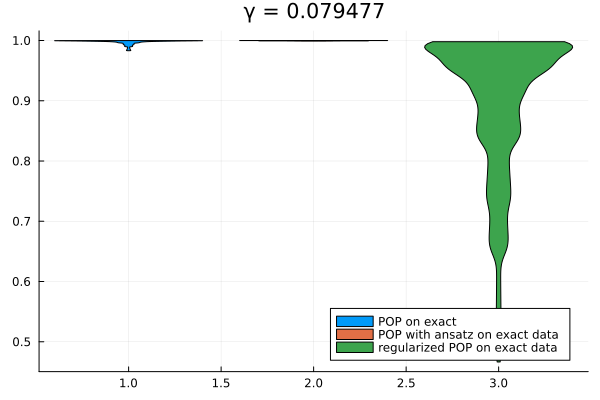

In [19]:
violin([Fˢⁱᵈᵉˣ,  Fₑₓₐₙ, Fₑₓʳᵉᵍ ],
        labels = ["POP on exact" "POP with ansatz on exact data" "regularized POP on exact data"],
        legend = :bottomright)
title!("γ = "*γᵗˣᵗ)
#savefig("violin_"*γᵗˣᵗ*".png")

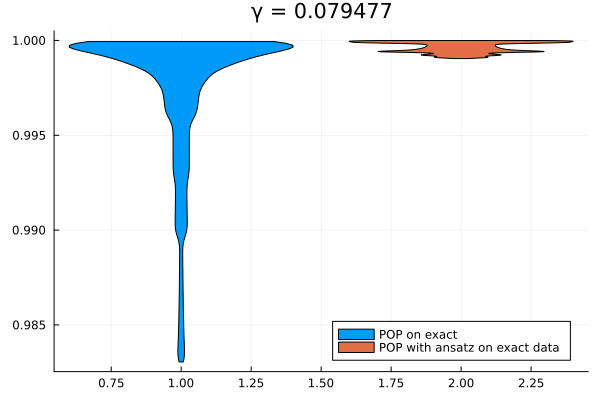

In [20]:
violin([Fˢⁱᵈᵉˣ, Fₑₓₐₙ],
        labels = ["POP on exact" "POP with ansatz on exact data" ],
        legend = :bottomright)
title!("γ = "*γᵗˣᵗ)

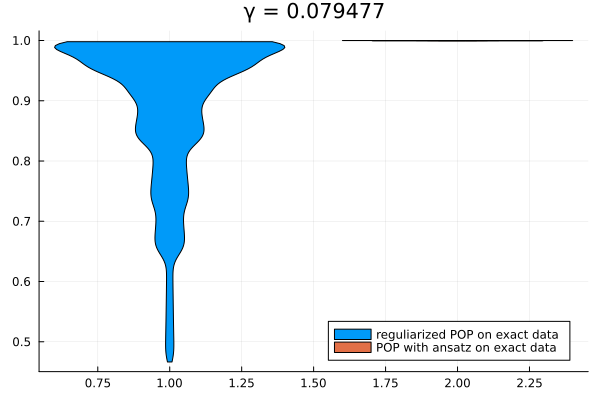

In [21]:
violin([ Fₑₓʳᵉᵍ, Fₑₓₐₙ],
        labels = ["reguliarized POP on exact data" "POP with ansatz on exact data" ],
        legend = :bottomright)
title!("γ = "*γᵗˣᵗ)